<a href="https://colab.research.google.com/github/obeabi/Bayesian_AB_Testing/blob/main/Optimistic_InitialValue_Bernouli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import matplotlib.pyplot as plt
import numpy as np

In [4]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

## Bandit arm class

In [14]:
class Bandit:
  def __init__(self, p,EPS):
    # p: the win rate
    self.p = p
    self.p_estimate = 10
    self.N = 1
    self.EPS = EPS

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N +=1
    self.p_estimate = ((self.N - 1)* self.p_estimate    + x)/ self.N

  def update_EPS(self, EPS):
      self.EPS = 0*(self.EPS *0.75**0.5)


## Run experiment

In [18]:
def experiment():
  bandits = [Bandit(p,EPS) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  for i in range(NUM_TRIALS):
    # use optimistic initial values to select the next bandit
    j = np.argmax([b.p_estimate for b in bandits])

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

    # update the EPS for the bandit whose arm we just pulled
    bandits[j].update_EPS(EPS)

  # print mean estimates for each bandit
  for b in bandits:
    print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

mean estimate: 0.7222222222222222
mean estimate: 0.7419354838709677
mean estimate: 0.7481414506730963
total reward earned: 7453.0
overall win rate: 0.7453
num times selected each bandit: [18, 31, 9954]


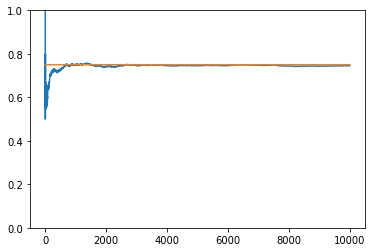

In [19]:
# results
if __name__ == "__main__":
  experiment()